### Imports

In [58]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [60]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Optima',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15)     # tick labels bigger
plt.rc('ytick', labelsize=15)     # tick labels bigger
plt.rc('savefig', dpi=300)       # higher res outputs

### Reading dataset

In [61]:
df = pd.read_csv('/Users/kritikanayyar/Documents/MMA/3 & 4. Complementary Courses Selection/2. INSY-695-075-Adv Topics in Information Syst (Jan-Feb)/Group Project/bank+marketing 2/bank/bank-full.csv', encoding='utf-8', delimiter=';')

Dataset can be download from https://archive.ics.uci.edu/dataset/222/bank+marketing

#### Check the data

In [62]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Analyze the data

#### Check the types

In [63]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Check the dimensions

In [64]:
df.shape

(45211, 17)

### Check the column names

In [65]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Check data dictionary to understand data

In [66]:
df_description = pd.read_excel('/Users/kritikanayyar/Documents/MMA/3 & 4. Complementary Courses Selection/2. INSY-695-075-Adv Topics in Information Syst (Jan-Feb)/Group Project/bank-data-dictionary.xlsx')

df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,age,Feature,Integer,Age,nan,nan,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",nan,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",nan,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",nan,no
4,default,Feature,Binary,nan,has credit in default?,nan,no
5,balance,Feature,Integer,nan,average yearly balance,euros,no
6,housing,Feature,Binary,nan,has housing loan?,nan,no
7,loan,Feature,Binary,nan,has personal loan?,nan,no
8,contact,Feature,Categorical,nan,"contact communication type (categorical: 'cellular','telephone')",nan,yes
9,day_of_week,Feature,Date,nan,last contact day of the week,nan,no


#### Provide descriptive statistics

In [67]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Checking Columns

In [68]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

### Missing Values Calculation

In [69]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [70]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Checking for duplicates

In [71]:
df.duplicated().sum()

0

#### Check unique values

In [72]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Exploratory Data Analysis

#### Numerical data distributions

In [73]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
object_columns = df.select_dtypes(include='object')

print('Numerical Columns:', numerical_columns)

Numerical Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


#### Univariate Analysis
The univariate analysis focuses on exploring individual variables in isolation. It allows you to understand the distribution of each variable and gain insight into its characteristics. Box plots, histograms, and bar charts are commonly used visualizations for univariate analysis.

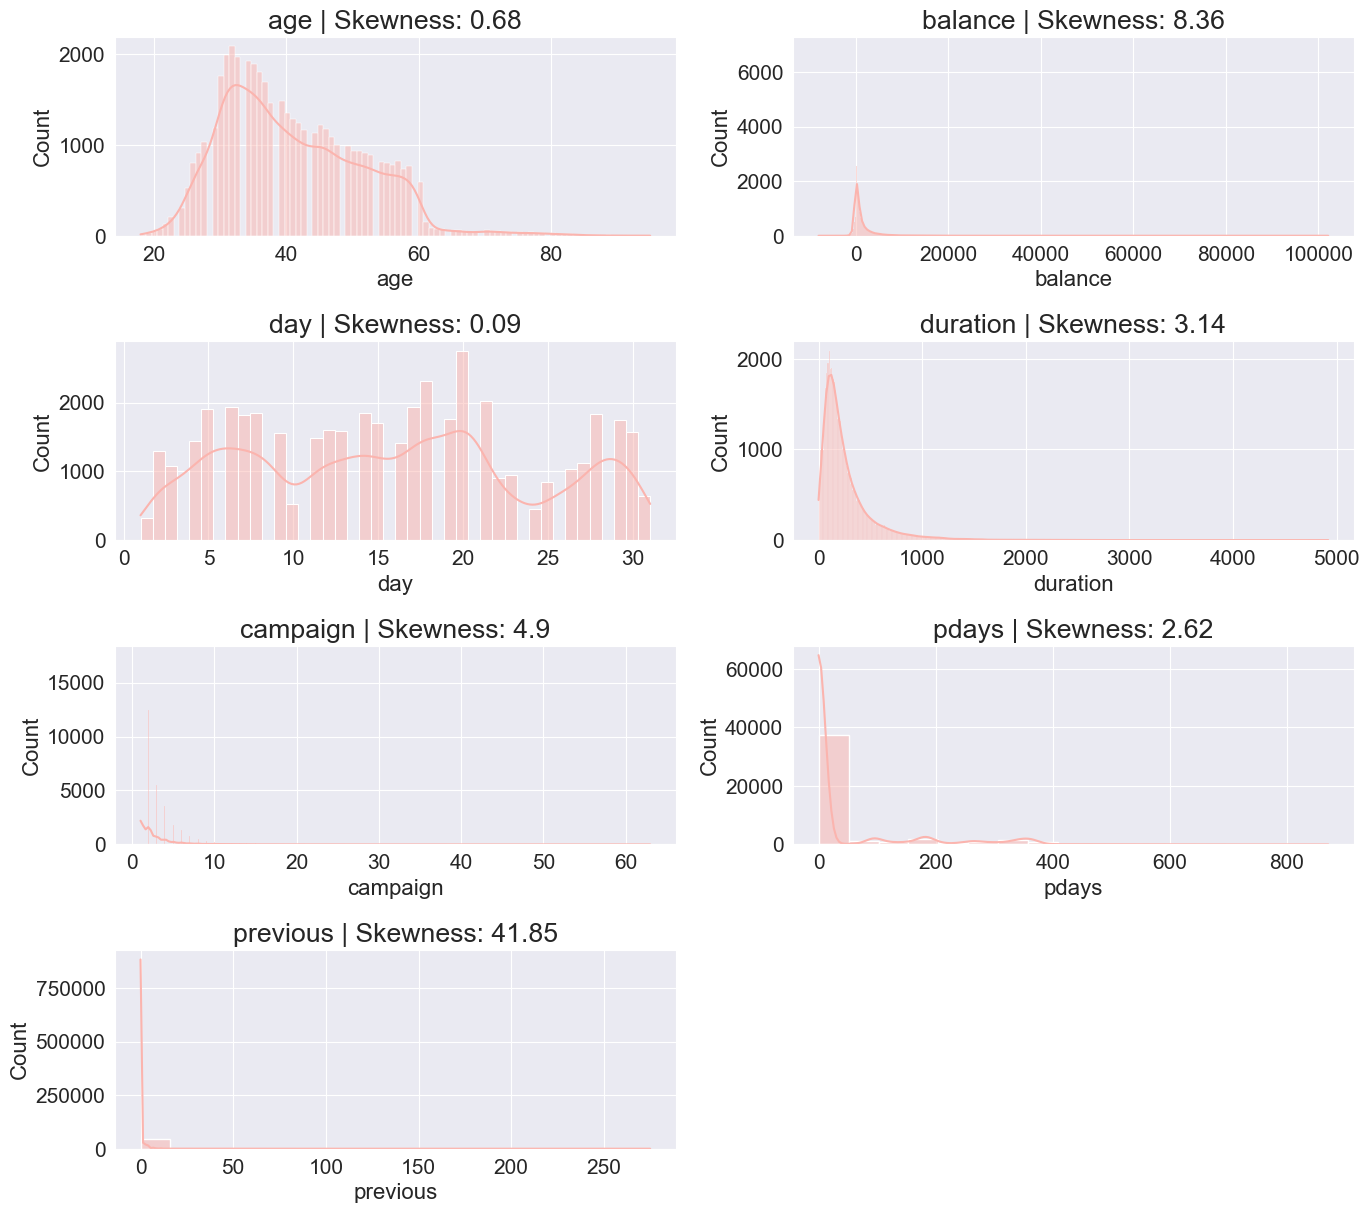

In [74]:
# Set Seaborn style
sns.set_style("darkgrid")
 
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
 
# Adjust layout and show plots
plt.tight_layout()
plt.show()

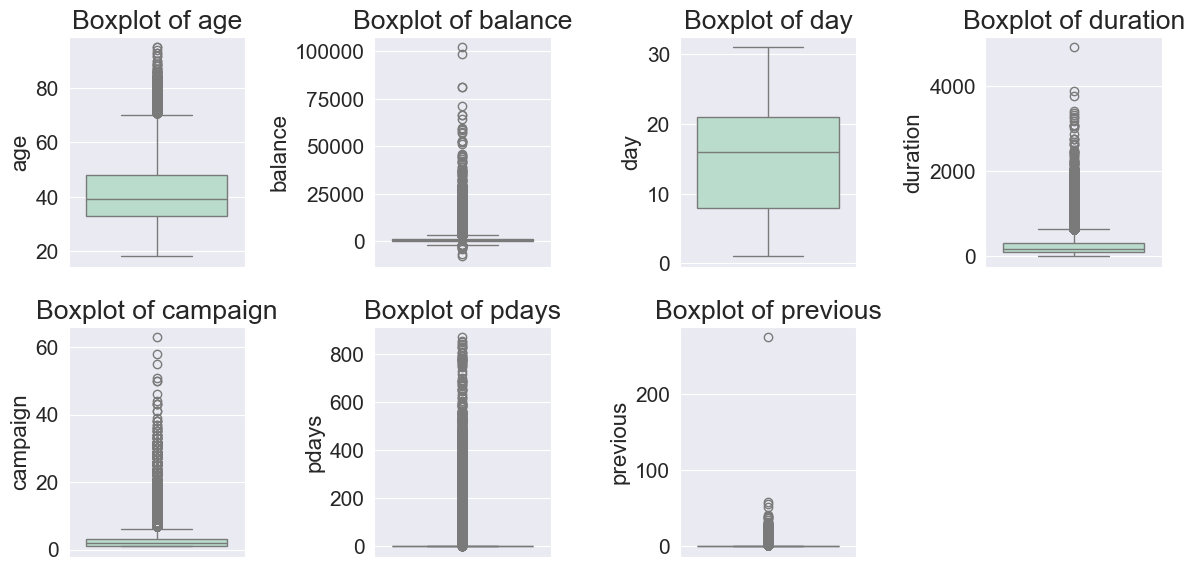

In [75]:
# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical columns and draw box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[i], palette='Pastel2')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

# Remove empty subplots if there are fewer than 8 numerical columns
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<div style="background-color: #ffffcc; padding: 10px;">
    <span style="color: red;"><strong>Important Note:</strong></span> Features <code>balance</code>, <code>duration</code>, and <code>campaign</code> are highly skewed, hence we need to perform outlier treatment.
</div>

##### Investigating the skewed columns

In [76]:
# Initialize an empty list to store the results
top_value_counts = []

# Loop through numerical columns
for column in numerical_columns:
    # Get value counts for the column
    value_counts = df[column].value_counts().head(3)
    # Append the results to the list
    top_value_counts.extend([(column, value, count) for value, count in zip(value_counts.index, value_counts.values)])

# Create a DataFrame from the list
top_value_counts_df = pd.DataFrame(top_value_counts, columns=['Column', 'Value', 'Count'])

# Display the top 3 value counts DataFrame
print(top_value_counts_df)

      Column  Value  Count
0        age     32   2085
1        age     31   1996
2        age     33   1972
3    balance      0   3514
4    balance      1    195
5    balance      2    156
6        day     20   2752
7        day     18   2308
8        day     21   2026
9   duration    124    188
10  duration     90    184
11  duration     89    177
12  campaign      1  17544
13  campaign      2  12505
14  campaign      3   5521
15     pdays     -1  36954
16     pdays    182    167
17     pdays     92    147
18  previous      0  36954
19  previous      1   2772
20  previous      2   2106


In [77]:
# Count the number of observations having -1 in pdays AND 0 in previous
len(df[(df['pdays'] == -1) & (df['previous'] == 0)])

36954

<div style="background-color: #ffffcc; padding: 10px;">
    <span style="color: red;"><strong>Important Note:</strong></span> We can see that <code>pdays</code> (number of days that passed by after the client was last contacted from a previous campaign) contains 36,954 values as -1, which means that the client was not previously contacted. Consequently, 36,954 observations have 0 for <code>previous</code> (number of contacts performed before this campaign and for this client). Hence, it's necessary to remove features <code>pdays</code> and <code>previous</code> for modeling.
</div>

#### Categorical data distributions

In [78]:
print('Object Columns:', object_columns.columns)

Object Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [79]:
# Iterate over object columns and print unique values
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column 'marital': ['married' 'single' 'divorced']
Unique values in column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column 'default': ['no' 'yes']
Unique values in column 'housing': ['yes' 'no']
Unique values in column 'loan': ['no' 'yes']
Unique values in column 'contact': ['unknown' 'cellular' 'telephone']
Unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome': ['unknown' 'failure' 'other' 'success']
Unique values in column 'y': ['no' 'yes']


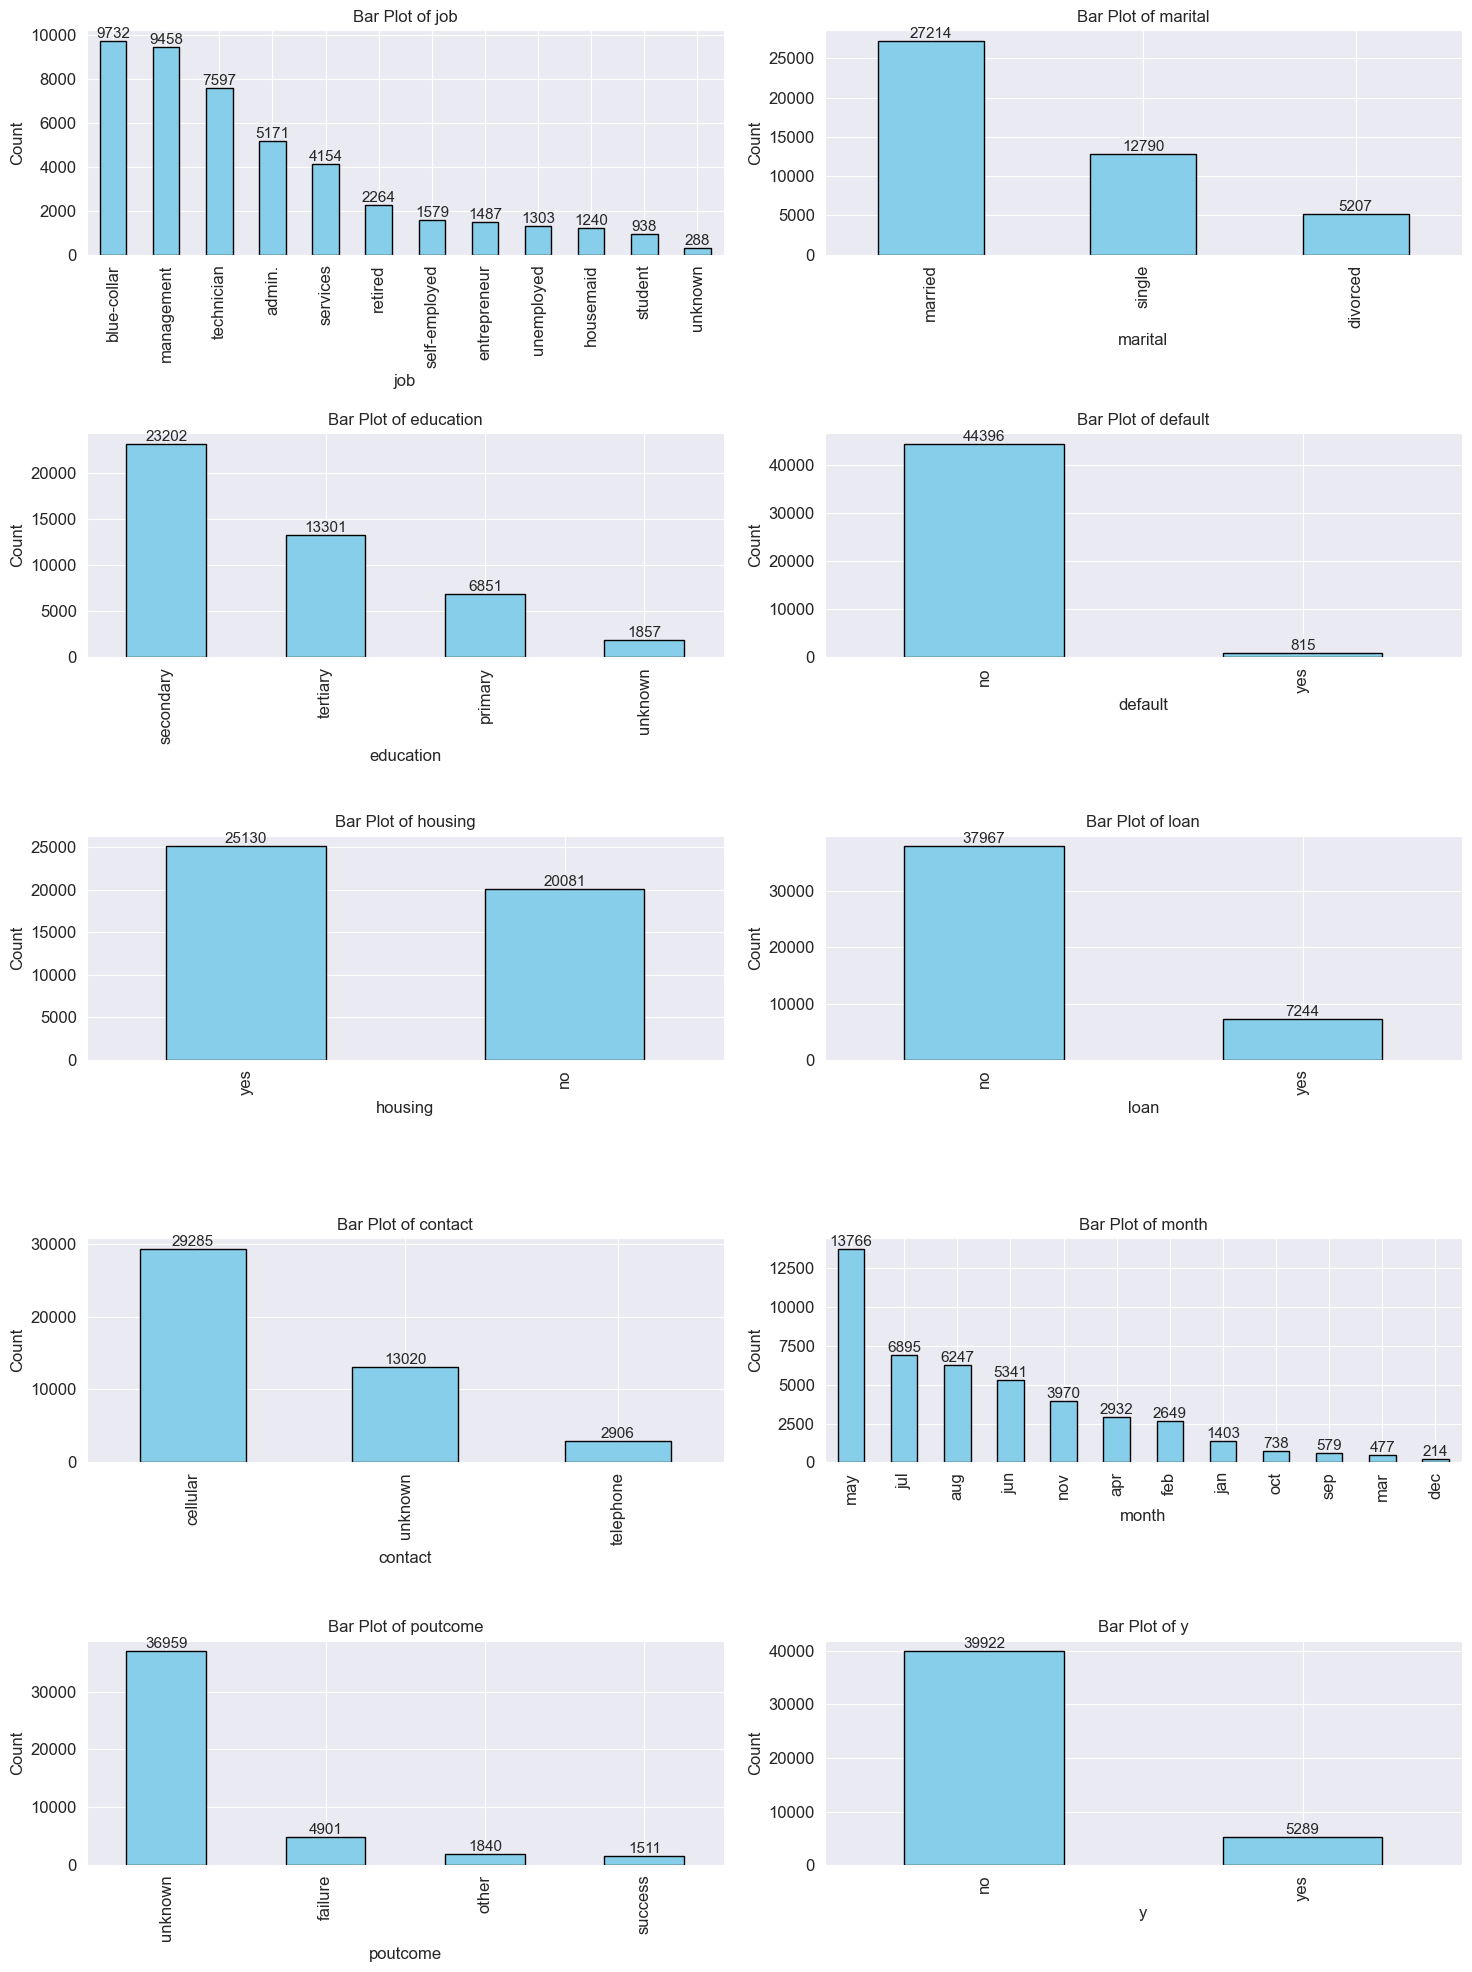

In [80]:
# Create subplots with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over object columns and draw bar plots
for i, column in enumerate(object_columns):
    # Calculate value counts for the column
    value_counts = df[column].value_counts()
    # Plot bar plot
    ax = value_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    ax.set_title(f'Bar Plot of {column}', fontsize=12)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)  # Reduce font size of tick labels
    # Add labels (count #) for each bar with reduced font size
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=11)

# Remove empty subplots if there are fewer than 10 object columns
for j in range(len(object_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout after removing empty subplots
plt.tight_layout()

# Show the plot
plt.show()

In [81]:
print("Count of observations where poutcome is 'unknown' AND job is 'unknown':", len(df[(df['poutcome'] == 'unknown') & (df['job'] == 'unknown')]))
print("Count of observations where poutcome is 'unknown' AND education is 'unknown':", len(df[(df['poutcome'] == 'unknown') & (df['education'] == 'unknown')]))
print("Count of observations where poutcome is 'unknown' AND contact is 'unknown':", len(df[(df['poutcome'] == 'unknown') & (df['contact'] == 'unknown')]))
print("Count of obseration where poutcome, marital, education, and contact are 'unknown':", len(df[(df['job'] == 'unknown') & (df['education'] == 'unknown') & (df['contact'] == 'unknown') & (df['poutcome'] == 'unknown')]))

Count of observations where poutcome is 'unknown' AND job is 'unknown': 255
Count of observations where poutcome is 'unknown' AND education is 'unknown': 1534
Count of observations where poutcome is 'unknown' AND contact is 'unknown': 12950
Count of obseration where poutcome, marital, education, and contact are 'unknown': 54


<div style="background-color: #ffffcc; padding: 10px;">
    <span style="color: red;"><strong>Important Note:</strong></span> Our objective is to predict whether a client would subscribe to a term deposit after the marketing campaign. So, 'unknown' values in features <code>job</code>, <code>education</code>, and <code>contact</code> communication type are acceptable for our analysis. However, <code>poutcome</code> (outcome of the previous marketing campaign) has quite a lot of 'unknown' values. Hence, we must remove this from our analysis.
</div>

#### Bivariate analysis
Bivariate analysis examines the relationship between two variables. Scatter plots are widely used to visualize the relationship between two continuous variables. Heatmaps and clustered bar charts are helpful when comparing two categorical variables. Understanding the relationships between variables can uncover potential correlations and dependencies, leading to further investigation.

<Figure size 1000x600 with 0 Axes>

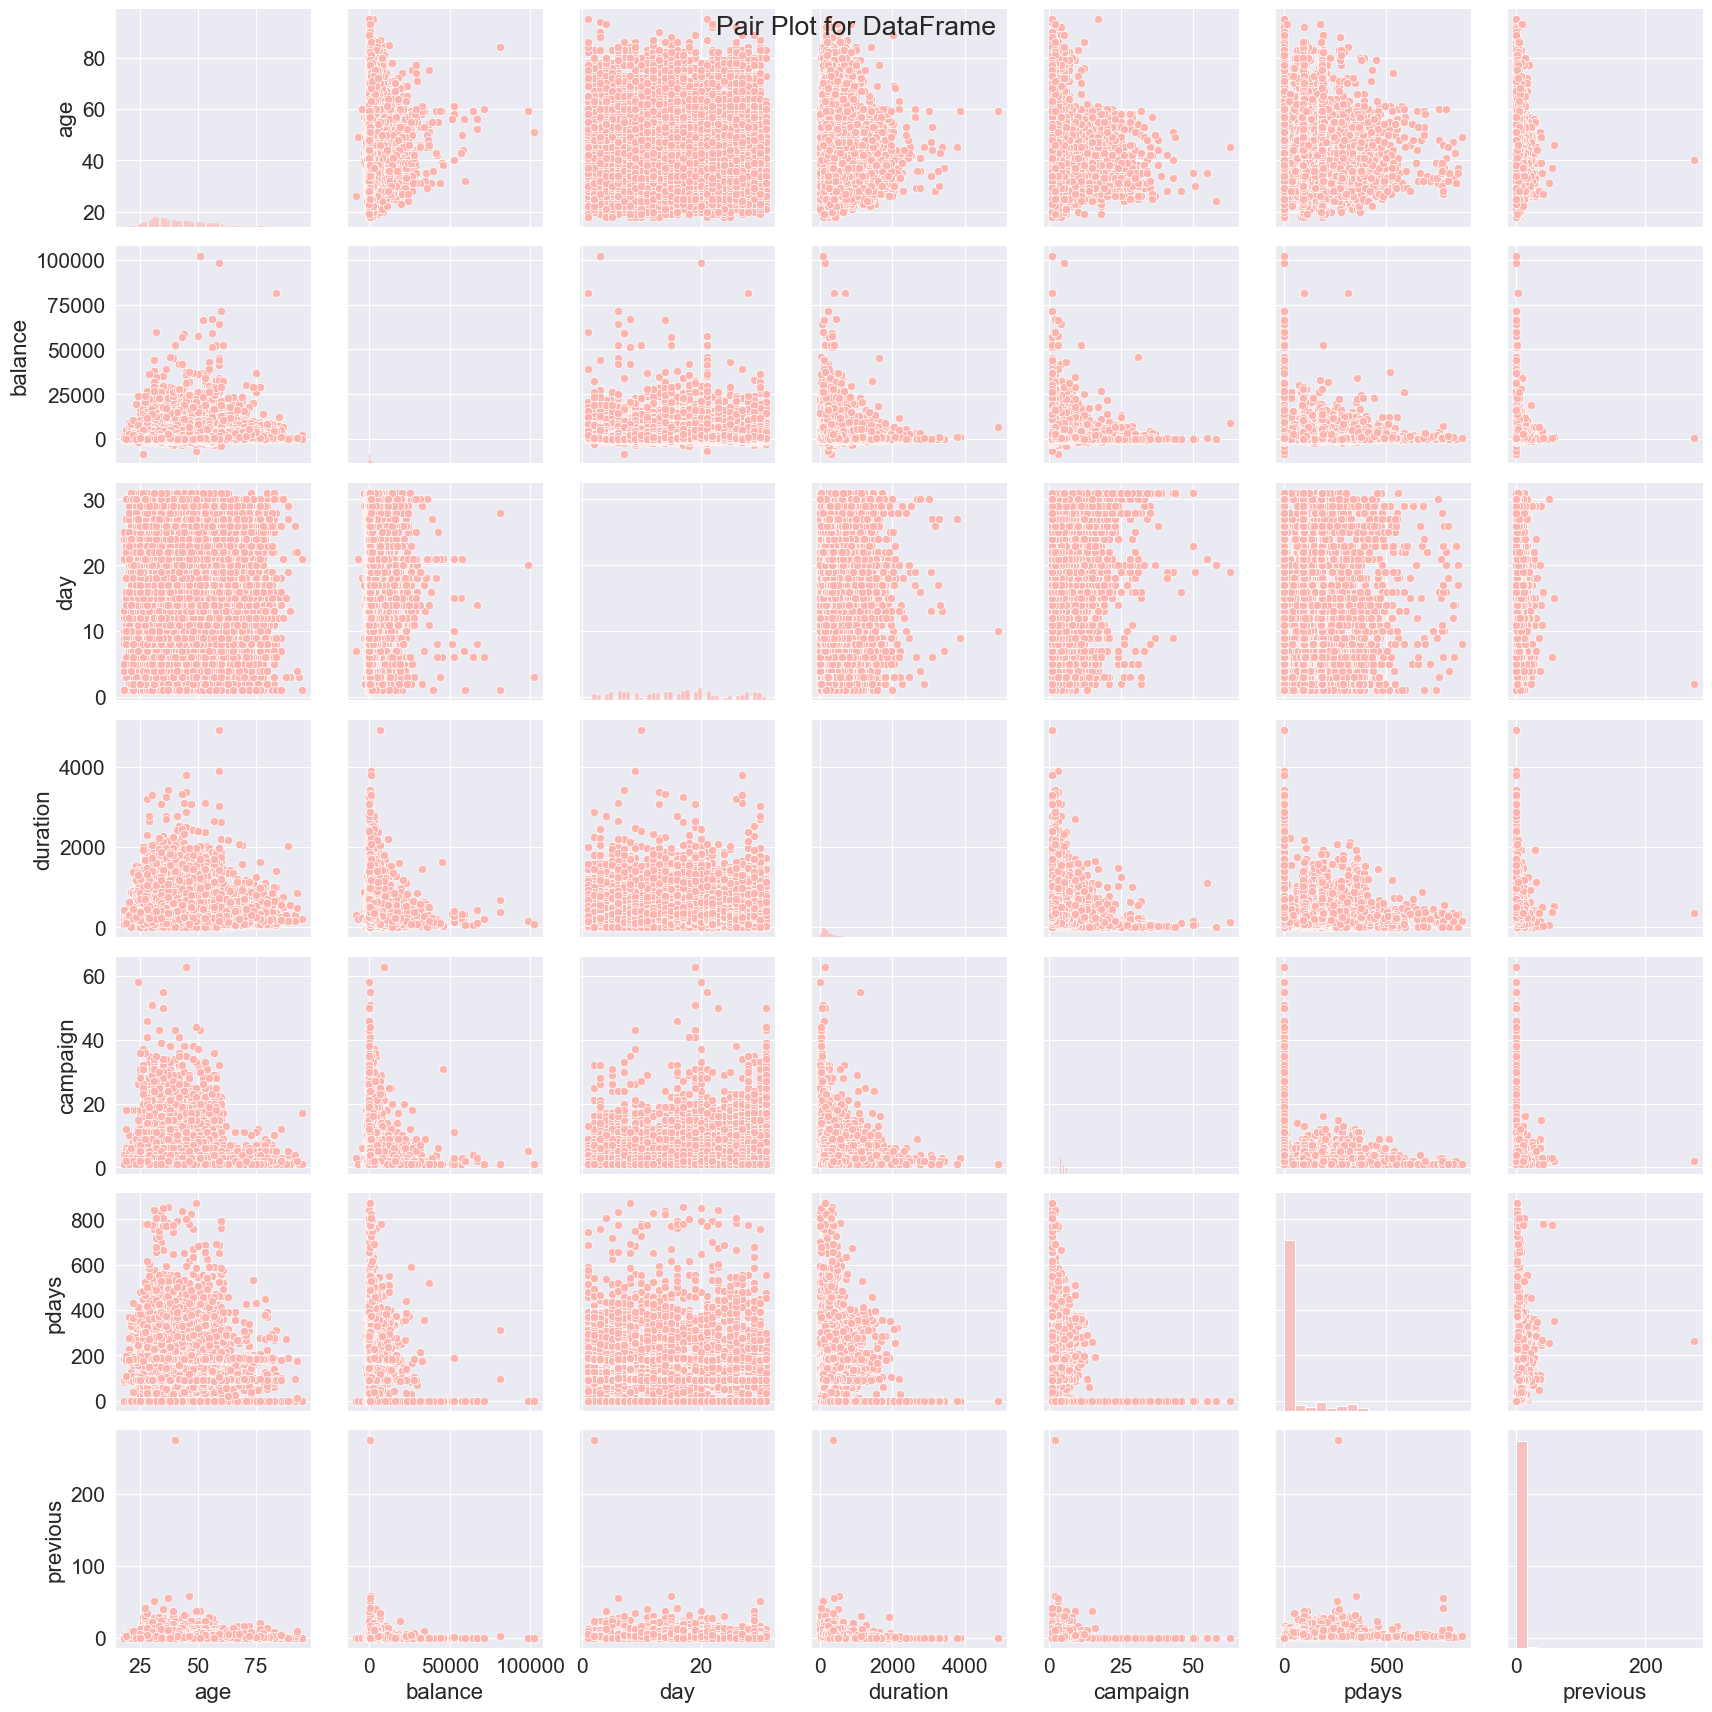

In [82]:
# Set the color palette
sns.set_palette("Pastel1")
 
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
 
# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df)
 
plt.suptitle('Pair Plot for DataFrame')
plt.show()

#### Multivariate analysis

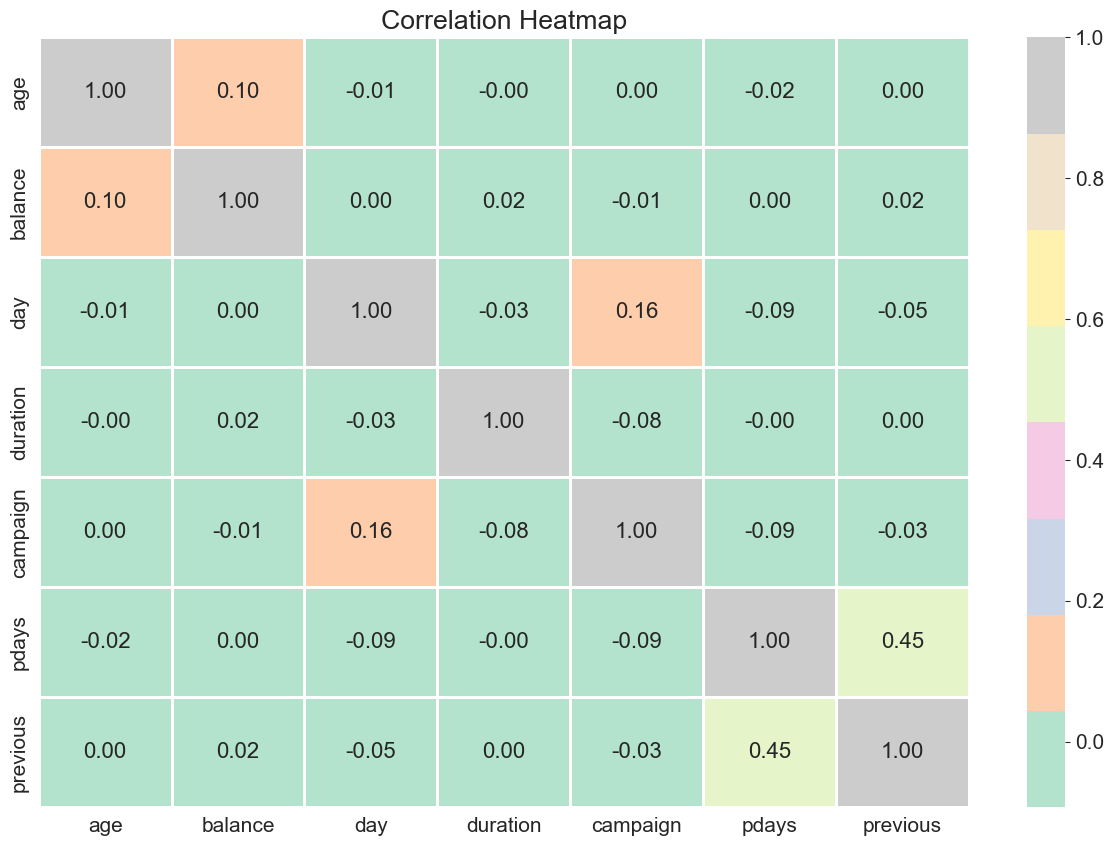

In [83]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()